# Import Library

In [2]:
import json
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model

# Architecting Model

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/170
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0269 - loss: 4.3792 
Epoch 2/170
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0550 - loss: 4.1262 
Epoch 3/170
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0800 - loss: 3.9889
Epoch 4/170
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0349 - loss: 3.9725 
Epoch 5/170
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0693 - loss: 3.8076
Epoch 6/170
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0741 - loss: 3.7498
Epoch 7/170
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0487 - loss: 3.7269 
Epoch 8/170
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0837 - loss: 3.7888
Epoch 9/170
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0476 - loss: 3.6695 
Epoch 10/170
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1178 - loss: 3.6563
Epoch 11/170
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0548 - loss: 3.5808
Epoch 12/170
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accu

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (8, 18, 16)            │        16,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (8, 18, 32)            │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (8, 18, 32)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (8, 32)                │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (8, 32)                │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (8, 80)                │         2,640 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,866 (401.82 KB)

 Trainable params: 34,288 (133.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 68,578 (267.89 KB)

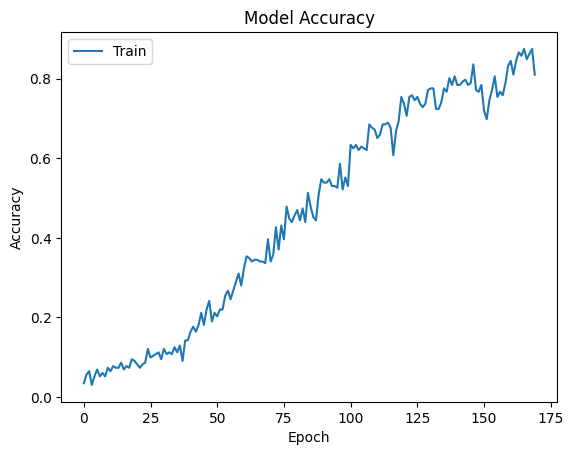

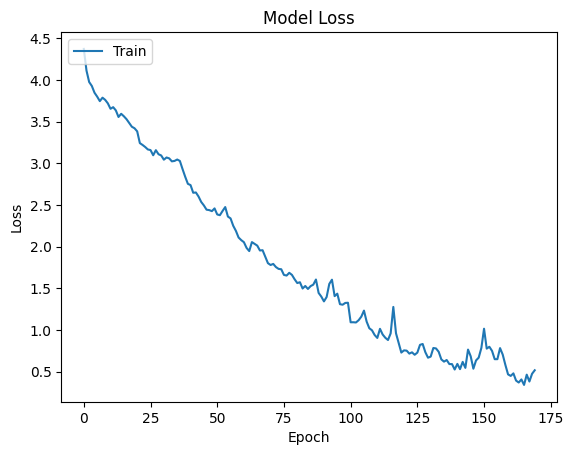

In [1]:
file_path = "/kaggle/input/mentalhealth/mental.json"
with open(file_path) as file:
    data = json.load(file)

# Extract patterns and tags
patterns = []
tags = []
responses = {}

for intent in data['intents']:
    for pattern in intent['patterns']:
        patterns.append(pattern)
        tags.append(intent['tag'])
    responses[intent['tag']] = intent['responses']

# Encode the tags
label_encoder = LabelEncoder()
encoded_tags = label_encoder.fit_transform(tags)

# Tokenize the patterns
tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(patterns)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(patterns)
padded_sequences = pad_sequences(sequences, padding="post")

# Prepare input and output data
input_data = np.array(padded_sequences)
output_data = tf.keras.utils.to_categorical(encoded_tags)

# Build the model
model = Sequential([
    Embedding(input_dim=1000, output_dim=16, input_length=input_data.shape[1]),
    LSTM(32, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

# Train the model
history = model.fit(input_data, output_data, epochs=170, batch_size=8)

# Save the model and tokenizer
model.save("/kaggle/working/mentalhealth_chatbot_model_final.h5.keras")
import pickle
with open("/kaggle/working/tokenizer.pickle", "wb") as handle:
    pickle.dump(tokenizer, handle)
with open("/kaggle/working/label_encoder.pickle", "wb") as enc:
    pickle.dump(label_encoder, enc)
with open("/kaggle/working/response.pickle", "wb") as resp:
    pickle.dump(responses, resp)

# Model summary
model.summary()

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Plot training loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()


# Generate Responses

In [3]:
model = load_model("/kaggle/working/mentalhealth_chatbot_model_final.h5.keras")
with open("/kaggle/working/tokenizer.pickle", "rb") as handle:
    tokenizer = pickle.load(handle)
with open("/kaggle/working/label_encoder.pickle", "rb") as enc:
    label_encoder = pickle.load(enc)

# Chat function
def chatbot_response(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=input_data.shape[1], padding="post")
    prediction = model.predict(padded)
    tag = label_encoder.inverse_transform([np.argmax(prediction)])
    return random.choice(responses[tag[0]])

# Test the chatbot
print("Chatbot is ready! Type 'quit' to exit.")
while True:
    user_input = input("You: ")
    if user_input.lower() == "quit":
        break
    response = chatbot_response(user_input)
    print("Bot:", response)


Chatbot is ready! Type 'quit' to exit.


You:  hi


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
Bot: Hi there. What brings you here today?


KeyboardInterrupt: Interrupted by user